<a href="https://colab.research.google.com/github/aliwahidiyan/Praktikum_KB/blob/main/POSTTEST7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# dataset: https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images

# Nama: Muhammad Ali Wahidiyan
# NIM:2209106011
# Kelas:A1'22

# import library yang kita di butuhkan untuk melakukan modeling dan jangan lupa unzip file dataset yang kita punya

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Input, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import os
import pathlib
import matplotlib.pyplot as plt

In [29]:
!unzip 'archive (6)'

Archive:  archive (6).zip
replace Alzheimer_s Dataset/MildDemented/mildDem0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# di sini kita kan mengsplit data kita menjadi 3 bagian train,val,test

In [3]:
!pip install split-folders


In [4]:
import splitfolders
import os

# Check the contents of the source directory
source_dir = "Alzheimer_s Dataset"
print("List of files and subdirectories in the source directory:")
print(os.listdir(source_dir))

output_dir = "dataset_final"
seed = 1337
ratios = (0.8, 0.1, 0.1)

splitfolders.ratio(source_dir, output=output_dir, seed=seed, ratio=ratios)


List of files and subdirectories in the source directory:
['ModerateDemented', 'VeryMildDemented', 'NonDemented', 'MildDemented']


Copying files: 5121 files [00:00, 5618.93 files/s]


# disini kita akan melakukan image augmentation menggunakan ImageDataGenerator



In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
        validation_split = 0.2,
        rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

# di sini kita akan mengecek berapa banyak kelas dari data kita

In [9]:
train_generator= train_datagen.flow_from_directory(
    '/content/dataset_final/train',
    target_size=(150,150),
    batch_size=128,
    class_mode='categorical'
)
val_generator= train_datagen.flow_from_directory(
    '/content/dataset_final/val',
    target_size=(150,150),
    batch_size=128,
    class_mode='categorical'
)

Found 4095 images belonging to 4 classes.
Found 511 images belonging to 4 classes.


In [10]:
images, labels = train_generator.next()
len(images), len(labels), images[0].shape

(128, 128, (150, 150, 3))

# kemudian kita akan membuat model CNN dengan sequential

In [19]:
model = Sequential([
    # 1. feature extraction layer
    Conv2D(32,(3,3), activation = 'relu',padding='same', input_shape = (150,150,3)),
    MaxPool2D((2,2),strides=2,padding = 'same'),
    Conv2D(64,(3,3), activation = 'relu',padding='same'),
    MaxPool2D((2,2),strides=2,padding = 'same'),
    Conv2D(128,(3,3), activation = 'relu',padding='same'),
    # 2. fully connected layer
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(4, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

hist=model.fit(train_generator,epochs=20,
          validation_data =val_generator,
          verbose=1)

Epoch 1/20
32/32 [==============================] - 31s 900ms/step - loss: 1.3137 - accuracy: 0.4117 - val_loss: 1.0296 - val_accuracy: 0.5068
Epoch 2/20
32/32 [==============================] - 29s 907ms/step - loss: 1.0295 - accuracy: 0.4952 - val_loss: 1.0187 - val_accuracy: 0.5010
Epoch 3/20
32/32 [==============================] - 31s 970ms/step - loss: 1.0188 - accuracy: 0.5004 - val_loss: 1.0017 - val_accuracy: 0.5068
Epoch 4/20
32/32 [==============================] - 28s 877ms/step - loss: 1.0037 - accuracy: 0.5026 - val_loss: 0.9753 - val_accuracy: 0.5147
Epoch 5/20
32/32 [==============================] - 28s 879ms/step - loss: 0.9902 - accuracy: 0.5140 - val_loss: 0.9564 - val_accuracy: 0.5284
Epoch 6/20
32/32 [==============================] - 28s 867ms/step - loss: 0.9666 - accuracy: 0.5304 - val_loss: 0.9597 - val_accuracy: 0.5342
Epoch 7/20
32/32 [==============================] - 28s 880ms/step - loss: 0.9855 - accuracy: 0.5245 - val_loss: 0.9586 - val_accuracy: 0.5362

# evaluasi model yaitu akurasi = 58% dan loss = 88%

In [20]:
model.evaluate(val_generator)

4/4 [==============================] - 3s 707ms/step - loss: 0.8815 - accuracy: 0.5890


[0.881482720375061, 0.5890411138534546]

# kemudian membuat grafik pergerakan **akurasi**

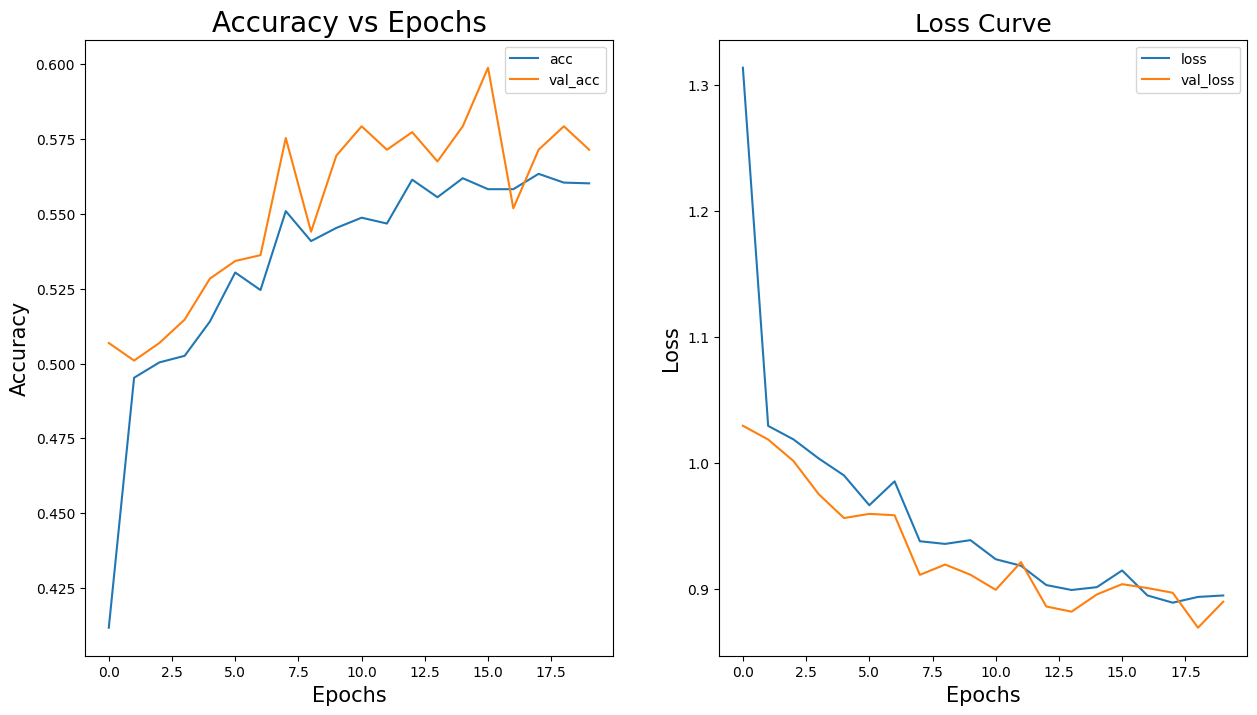

In [27]:
def model_performance_graphs():

    fig, axes = plt.subplots(1, 2, figsize = (15, 8))

    axes[0].plot(hist.epoch, hist.history['accuracy'], label = 'acc')
    axes[0].plot(hist.epoch, hist.history['val_accuracy'], label = 'val_acc')
    axes[0].set_title('Accuracy vs Epochs', fontsize = 20)
    axes[0].set_xlabel('Epochs', fontsize = 15)
    axes[0].set_ylabel('Accuracy', fontsize = 15)
    axes[0].legend()

    axes[1].plot(hist.epoch, hist.history['loss'], label = 'loss')
    axes[1].plot(hist.epoch, hist.history['val_loss'], label="val_loss")
    axes[1].set_title("Loss Curve",fontsize=18)
    axes[1].set_xlabel("Epochs",fontsize=15)
    axes[1].set_ylabel("Loss",fontsize=15)
    axes[1].legend()

    plt.show()

model_performance_graphs()